In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random

2023-01-14 10:42:45.158597: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
train_dir = '../input/shoe-dataset/shoeTypeClassifierDataset/training'
test_dir = '../input/shoe-dataset/shoeTypeClassifierDataset/validation'

In [3]:
Name = os.listdir(train_dir)
print(Name)
print(len(Name))

['sandals', 'soccer_shoes', 'sneakers', 'boots', 'flip_flops', 'loafers']
6


In [4]:
N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

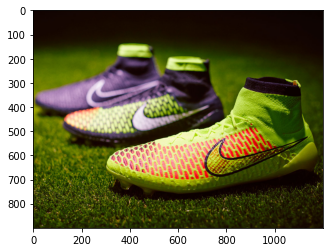

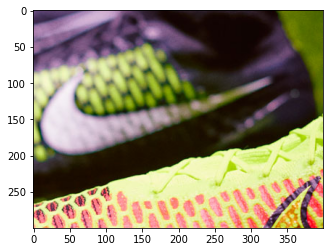

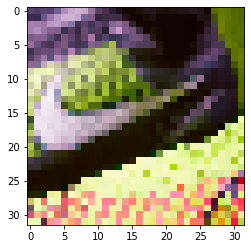

In [5]:
path0='../input/shoe-dataset/shoeTypeClassifierDataset/training/soccer_shoes/image120.jpeg'
image=cv2.imread(path0)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()
sp=image.shape

image2=image[(sp[0]//3):(sp[0]*2//3),(sp[1]//3):(sp[1]*2//3),:]
plt.imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB))
plt.show()

image3=cv2.resize(image2,dsize=(32,32),interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(image3,cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
trainX=[]
trainY0=[]
count=0
for name in tqdm(os.listdir(train_dir)):
    path=os.path.join(train_dir,name)
    for im in os.listdir(path):
        image=cv2.imread(os.path.join(path,im))
        if type(image)==np.ndarray:
            sp=image.shape
            image2=image[(sp[0]//3):(sp[0]*2//3),(sp[1]//3):(sp[1]*2//3),:]
            image3=cv2.resize(image2,dsize=(32,32),interpolation=cv2.INTER_CUBIC)
            trainX+=[image3]
            trainY0+=[count]
    count=count+1

100%|██████████| 6/6 [00:30<00:00,  5.15s/it]


In [7]:
testX=[]
testY0=[]
count=0
for name in tqdm(os.listdir(test_dir)):
    path=os.path.join(test_dir,name)
    for im in os.listdir(path):
        image=cv2.imread(os.path.join(path,im))
        if type(image)==np.ndarray:
            sp=image.shape
            image2=image[(sp[0]//3):(sp[0]*2//3),(sp[1]//3):(sp[1]*2//3),:]
            image3=cv2.resize(image2,dsize=(32,32),interpolation=cv2.INTER_CUBIC)
            testX+=[image3]
            testY0+=[count]
    count=count+1

100%|██████████| 6/6 [00:06<00:00,  1.07s/it]


In [8]:
labels1=to_categorical(trainY0)
trainY=np.array(labels1)

In [9]:
trainX=np.array(trainX)
testX=np.array(testX)

In [10]:
trainx,testx,trainy,testy=train_test_split(trainX,trainY,test_size=0.2,random_state=44)

In [11]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [12]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(32,32,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

2023-01-14 10:43:28.945895: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-14 10:43:28.949362: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-14 10:43:29.010453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-14 10:43:29.011153: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2023-01-14 10:43:29.011228: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-01-14 10:43:29.048382: I tensorflow/stream_executor/platform/def

74842112/74836368 [==============================] - 1s 0us/step


In [13]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(len(Name), activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)

2023-01-14 10:43:36.516811: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-01-14 10:43:36.521693: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000140000 Hz


Epoch 1/100


2023-01-14 10:43:45.775903: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-01-14 10:43:46.675480: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-01-14 10:43:46.697559: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


38/38 [==============================] - 23s 175ms/step - loss: 4.0549 - accuracy: 0.1781 - val_loss: 2.5196 - val_accuracy: 0.2508
Epoch 2/100
38/38 [==============================] - 2s 44ms/step - loss: 1.9802 - accuracy: 0.3208 - val_loss: 2.0773 - val_accuracy: 0.2241
Epoch 3/100
38/38 [==============================] - 2s 43ms/step - loss: 1.7403 - accuracy: 0.3329 - val_loss: 2.0657 - val_accuracy: 0.2642
Epoch 4/100
38/38 [==============================] - 2s 46ms/step - loss: 1.6388 - accuracy: 0.3752 - val_loss: 2.0166 - val_accuracy: 0.2776
Epoch 5/100
38/38 [==============================] - 2s 56ms/step - loss: 1.5889 - accuracy: 0.3758 - val_loss: 2.0197 - val_accuracy: 0.2676
Epoch 6/100
38/38 [==============================] - 2s 46ms/step - loss: 1.6139 - accuracy: 0.3891 - val_loss: 1.8407 - val_accuracy: 0.3010
Epoch 7/100
38/38 [==============================] - 2s 43ms/step - loss: 1.5478 - accuracy: 0.3794 - val_loss: 2.0311 - val_accuracy: 0.2809
Epoch 8/100
38/3

In [16]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.39      0.27      0.32        45
           1       0.41      0.67      0.50        45
           2       0.33      0.08      0.13        48
           3       0.28      0.42      0.34        52
           4       0.50      0.26      0.34        58
           5       0.24      0.35      0.29        51

    accuracy                           0.34       299
   macro avg       0.36      0.34      0.32       299
weighted avg       0.36      0.34      0.32       299



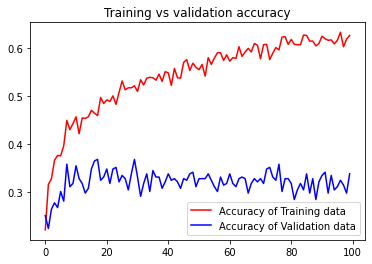

<Figure size 432x288 with 0 Axes>

In [17]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

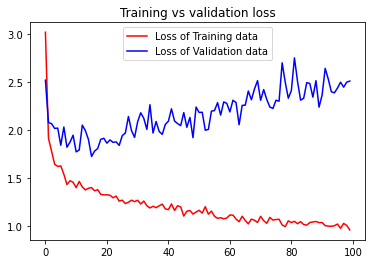

<Figure size 432x288 with 0 Axes>

In [18]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [19]:
pred2=model.predict(testX)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]
print(pd.Series(PRED).value_counts())

(300, 6)
3    75
1    72
5    51
4    43
0    37
2    22
dtype: int64


In [20]:
ANS=testY0
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.42333333333333334


In [21]:
m=len(testX)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

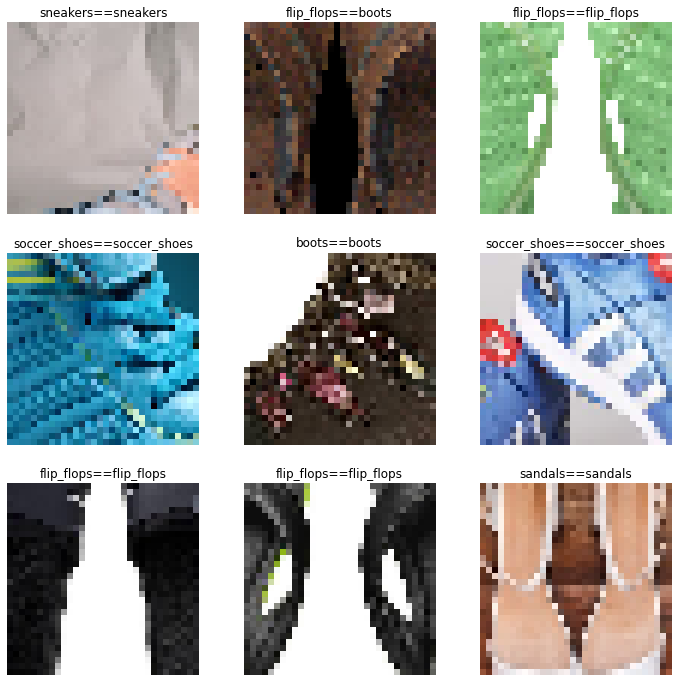

In [22]:
fig, axs = plt.subplots(3,3,figsize=(12,12))
for i in range(9):
    r=i//3
    c=i%3
    img1 = testX[M[i]]
    ax=axs[r][c].axis("off")
    actual=reverse_mapping[testY0[M[i]]]
    predict=reverse_mapping[PRED[M[i]]]    
    ax=axs[r][c].set_title(actual+'=='+predict)
    ax=axs[r][c].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()